In [1]:
from main import Circuit, Voltage, Capacitor, Resistor, connect, ground, import_subcircuit
from IPython.display import SVG
from matplotlib import pyplot as plt

Ignoring node x0.2
Ignoring node x0.3
Ignoring node x0.1
Ignoring node x0.30
Ignoring node x0.20


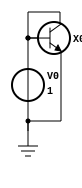

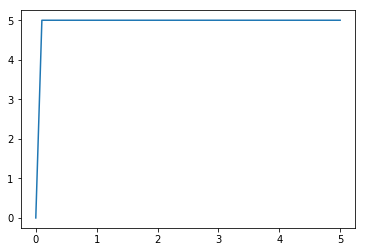

In [2]:
c = Circuit()

RFTransistor = import_subcircuit(c, 'BFR181_spice_v2.txt', 'BFR181', 'collector', 'base', 'emitter', symbol='npn')

dc = Voltage(c, piecewise=[0,   0, 
                           0.1, 5.0])
t = RFTransistor(c)

drive = connect(dc.pos, t.collector, t.base)
ground(dc.neg, t.emitter)

c.compute_transient(5,0.1)
plt.plot(c.time, drive.voltage) 

SVG(c.render_svg())

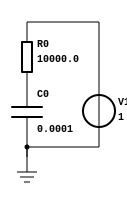

In [3]:
c = Circuit()
dc = Voltage(c, piecewise=[0,   0, 
                           0.1, 5.0])
c1 = Capacitor(c, capacitance=100e-6)
r1 = Resistor(c, resistance=10e3)

connect(dc.pos, r1)
filt = connect(r1, c1)
ground(dc.neg, c1)

SVG(c.render_svg())

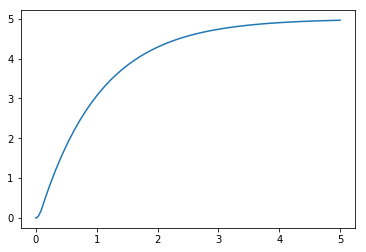

In [4]:
c.compute_transient(5,0.1)
plt.plot(c.time, filt.voltage)

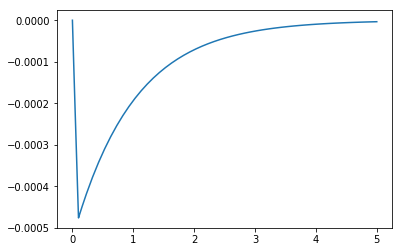

In [5]:
plt.plot(c.time, dc.current) 

In [6]:
c = Circuit()
dc = Voltage(c, voltage=2)
r1 = Resistor(c, resistance=100)
r2 = Resistor(c, resistance=200)
r3 = Resistor(c, resistance=200)

ground(dc.neg, r2, r3)
connect(dc.pos, r1)
div = connect(r1, r2, r3)

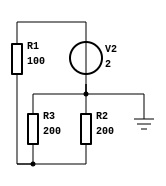

In [7]:
SVG(c.render_svg())

In [8]:
c.compute_operating_point()
print(div.voltage)

1.0


In [9]:
c.compute_dc_sweep((dc, 0, 1, 0.5))
print(div.voltage)

Ignoring node v-sweep [0.  0.5 1. ]
[0.   0.25 0.5 ]
